In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def imshow(title = "Image" , image = None , size = 10):
    w , h = image.shape[0] , image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size , size * aspect_ratio))
    plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

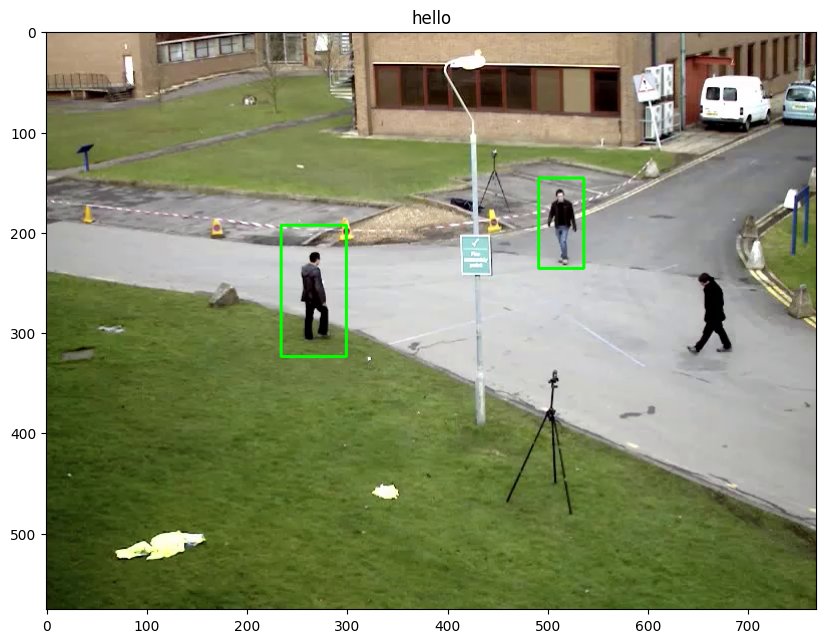

In [4]:
cap = cv2.VideoCapture('images/walking.mp4')
body_classifire = cv2.CascadeClassifier('xmls/haarcascade_fullbody.xml')
ret , frame = cap.read()

if ret:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    bodies = body_classifire.detectMultiScale(gray, 1.1, 3)
   
    for (x, y, w, h) in bodies:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

cap.release()
imshow("hello",frame)

In [5]:
cap = cv2.VideoCapture('images/walking.mp4')
w  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

body_classifire = cv2.CascadeClassifier('xmls/haarcascade_fullbody.xml')

while True:
    ret , frame = cap.read()
    if ret:
        gray  = cv2.cvtColor(frame , cv2.COLOR_BGR2GRAY)
        bodies = body_classifire.detectMultiScale(gray , 1.1 , 3)
        for (x , y , w , h) in bodies:
            cv2.rectangle(frame , (x , y) , (x+w , y+h) , (0 , 255 , 0) , 2)
        out.write(frame)
    else:
        break

cap.release()
out.release()

